# Библиотеки

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv', sep=';')
df = df.apply(pd.to_numeric, errors='coerce')
imputer = SimpleImputer(strategy='most_frequent')

# Примените imputer к DataFrame df
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df = df.abs()
df

,THP,WCT,GOR,PUMP,LIQ,BHP
0,1.935320,0.274556,30.115301,38.259932,1.911736,81.60
1,97.000000,0.903287,30.503625,38.023588,19.952752,77.69
2,1.088830,0.400938,30.141835,38.704510,37.934106,72.04
3,1.419345,0.348165,30.322438,38.661283,56.510475,66.05
4,1.350603,0.954636,30.327780,38.292798,74.555543,61.45
...,...,...,...,...,...,...
34295,97.000000,1.880224,250.364370,60.938765,277.313384,212.78
34296,97.000000,1.786033,250.172131,60.564574,295.424946,229.57
34297,97.000000,1.883817,250.391623,60.606323,313.457465,314.78
34298,97.000000,1.526007,250.120282,60.999503,331.799192,315.17


In [3]:
df.describe()

,THP,WCT,GOR,PUMP,LIQ,BHP
count,34300.000000,34300.000000,34300.000000,34300.000000,34300.000000,34300.000000
mean,18.470865,0.979272,139.939966,49.488427,176.095195,96.950438
std,32.872447,0.536031,73.368530,7.333377,105.954403,72.253132
min,1.000069,0.010118,30.000206,1.034181,1.000881,0.000000
25%,1.433314,0.657225,66.714284,42.431375,92.802694,40.280000
50%,1.871950,0.977583,140.472956,49.483595,184.704794,88.645000
75%,20.510000,1.301958,213.244819,56.573681,276.507260,132.805000
max,97.000000,56.985210,250.999970,60.999940,350.000000,323.280000


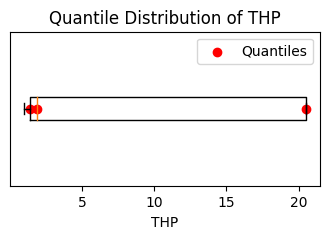

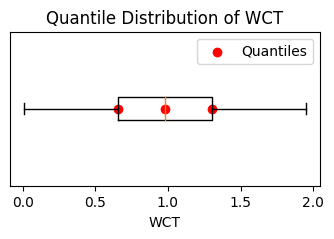

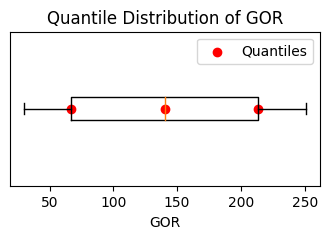

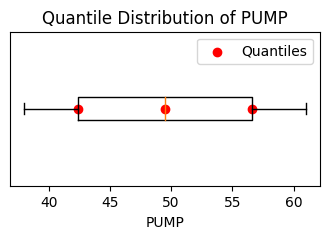

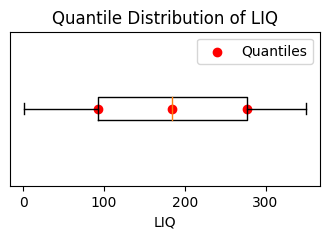

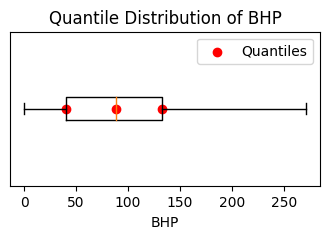

In [4]:
for column in df.columns:
    quantiles = df[column].quantile([0.25, 0.5, 0.75])  # Выберите интересующие вас квантили
    plt.figure(figsize=(4, 2))
    plt.boxplot(df[column].dropna(), vert=False, showfliers=False)  # Отключаем отображение выбросов
    plt.scatter(quantiles, [1, 1, 1], marker='o', color='red', label='Quantiles')  # Отображаем квантили красными точками
    plt.title(f'Quantile Distribution of {column}')
    plt.xlabel(column)
    plt.yticks([])  # Отключаем отображение оси Y
    plt.legend()
    plt.show()

In [5]:
df

,THP,WCT,GOR,PUMP,LIQ,BHP
0,1.935320,0.274556,30.115301,38.259932,1.911736,81.60
1,97.000000,0.903287,30.503625,38.023588,19.952752,77.69
2,1.088830,0.400938,30.141835,38.704510,37.934106,72.04
3,1.419345,0.348165,30.322438,38.661283,56.510475,66.05
4,1.350603,0.954636,30.327780,38.292798,74.555543,61.45
...,...,...,...,...,...,...
34295,97.000000,1.880224,250.364370,60.938765,277.313384,212.78
34296,97.000000,1.786033,250.172131,60.564574,295.424946,229.57
34297,97.000000,1.883817,250.391623,60.606323,313.457465,314.78
34298,97.000000,1.526007,250.120282,60.999503,331.799192,315.17


In [45]:
# Загрузка данных
X = df[['THP', 'WCT', 'GOR', 'PUMP', 'LIQ']].values
y = df['BHP'].values

# Настройка параметров модели
model = ExtraTreesRegressor(
    bootstrap=False,
    max_features=1.0,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=1000,
    random_state=1000)

# Обучение модели на всем объеме данных
model.fit(X, y)

# Оценка модели на тех же данных
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
print(f'MSE: {mse}')

MSE: 1.6834929236826744e-06


In [46]:
# Оценка качества модели на всем тестовом наборе
model.fit(X, y)
y_pred_all = model.predict(X)
mse_all = mean_squared_error(y, y_pred_all)
r2_all = r2_score(y, y_pred_all)
mae_all = mean_absolute_error(y, y_pred_all)
print(f"Среднеквадратичная ошибка на всем наборе: {mse_all}")
print(f"Коэффициент детерминации R^2 на всем наборе: {r2_all}")
print(f"Средняя абсолютная ошибка на всем наборе: {mae_all}")

Среднеквадратичная ошибка на всем наборе: 1.6834929236826744e-06
Коэффициент детерминации R^2 на всем наборе: 0.9999999996775142
Средняя абсолютная ошибка на всем наборе: 7.090855317139398e-05


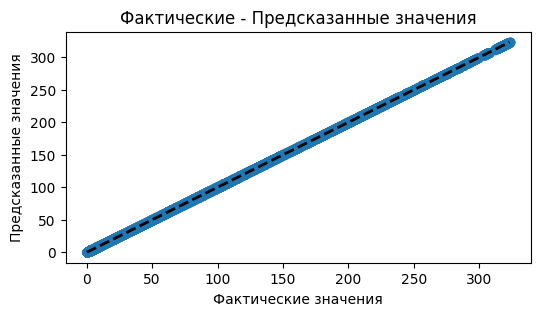

In [47]:
# Визуализация результатов
plt.figure(figsize=(6, 3))
plt.scatter(y, y_pred_all, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Линия идеального соответствия
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактические - Предсказанные значения')
plt.show()

In [49]:
# Загрузка валидационных данных
df_val = pd.read_csv('val.csv', sep=';')
X_val = df_val[['THP', 'WCT', 'GOR', 'PUMP', 'LIQ']]

# Преобразование DataFrame в массив NumPy
X_val_np = X_val.values

# Прогнозирование на валидационных данных
y_pred_val = model.predict(X_val_np)

# Сохранение файла с ответами
predictions_df = pd.DataFrame(y_pred_val, columns=["BHP"])
predictions_df.to_csv('predictions4.csv', sep=';', index=False, encoding="utf-8")
predictions_df

,BHP
0,89.30157
1,70.65489
2,95.67169
3,132.40217
4,137.13254
...,...
3120,34.93586
3121,56.48635
3122,86.85181
3123,148.44316
